# TASK 1 : Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [ ]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir=os.path.join(main_dir, 'train')
#set the path to the test dir
test_dir=os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir=os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir=os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir=os.path.join(train_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir=os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[ : 10])

train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[ : 10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[ : 10])

test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[ : 10])

['COVID19(335).jpg', 'COVID19(18).jpg', 'COVID19(443).jpg', 'COVID19(477).jpg', 'COVID-19 (151).jpg', 'COVID-19 (20).jpeg', 'COVID19(496).jpg', 'COVID19(307).jpg', 'COVID19(193).jpg', 'COVID19(38).jpg']
['NORMAL(1107).jpg', 'NORMAL(277).jpg', 'NORMAL(610).jpg', 'NORMAL(1099).jpg', 'NORMAL(1400).jpg', 'NORMAL(734).jpg', 'NORMAL(983).jpg', 'NORMAL(511).jpg', 'NORMAL(254).jpg', 'NORMAL(892).jpg']
['COVID19(335).jpg', 'COVID19(18).jpg', 'COVID19(443).jpg', 'COVID19(477).jpg', 'COVID-19 (151).jpg', 'COVID-19 (20).jpeg', 'COVID19(496).jpg', 'COVID19(307).jpg', 'COVID19(193).jpg', 'COVID19(38).jpg']
['NORMAL(264).jpg', 'NORMAL(623).jpg', 'NORMAL(1371).jpg', 'NORMAL(1578).jpg', 'NORMAL(956).jpg', 'NORMAL(1301).jpg', 'NORMAL(512).jpg', 'NORMAL(498).jpg', 'NORMAL(953).jpg', 'NORMAL(1204).jpg']


In [ ]:
#print the total no of images present in each dir
print("total images inn training set :" ,len(train_covid_names + train_normal_names) )
print("total images inn testing set :" ,len(test_covid_names + test_normal_names) )

total images inn training set : 1811
total images inn testing set : 862


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(335).jpg', '/content/datasets/Data/train/COVID19/COVID19(18).jpg', '/content/datasets/Data/train/COVID19/COVID19(443).jpg', '/content/datasets/Data/train/COVID19/COVID19(477).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (151).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (20).jpeg', '/content/datasets/Data/train/COVID19/COVID19(496).jpg', '/content/datasets/Data/train/COVID19/COVID19(307).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1107).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(277).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(610).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1099).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1400).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(734).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(983).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(511).jpg']


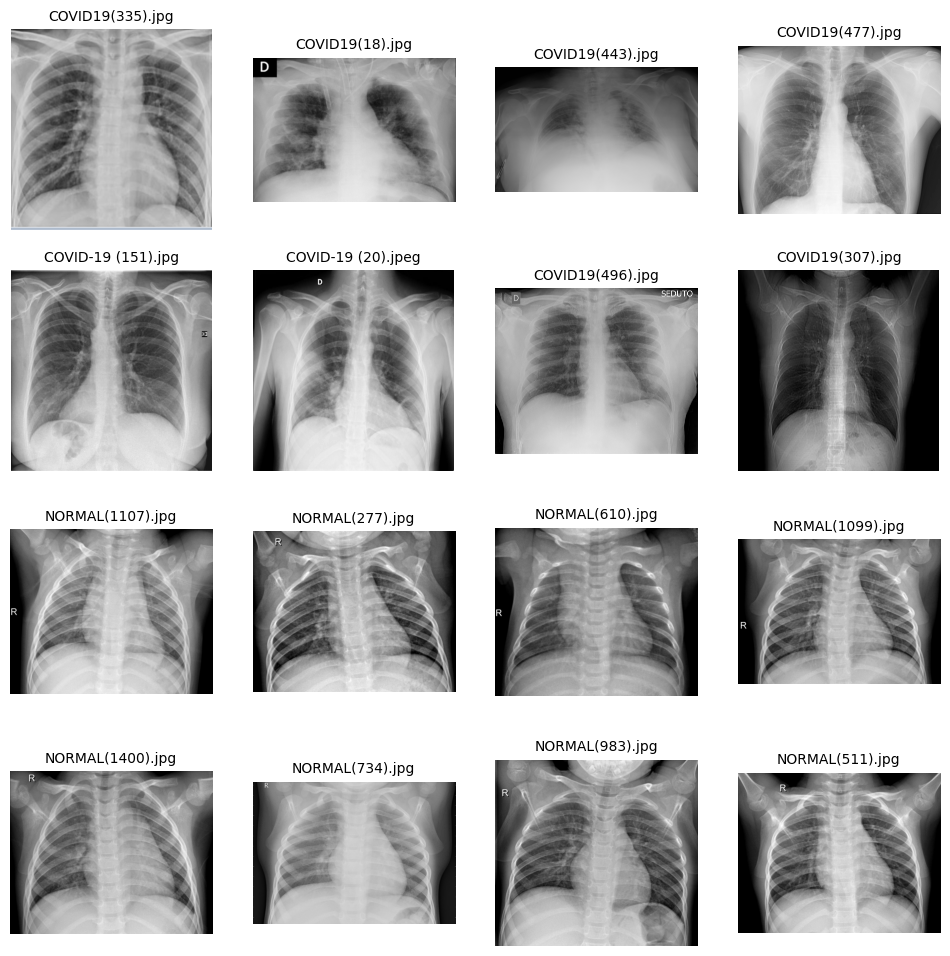

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/' ,6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data, fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size=32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size=32,
                                                 class_mode = 'binary')
test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME' ,activation='relu' ,input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME' ,activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs =30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 46s 1s/step - loss: 0.0844 - accuracy: 0.9717 - val_loss: 0.0885 - val_accuracy: 0.9779
Epoch 2/30
46/46 [==============================] - 42s 916ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0698 - val_accuracy: 0.9834
Epoch 3/30
46/46 [==============================] - 43s 936ms/step - loss: 0.0648 - accuracy: 0.9731 - val_loss: 0.0846 - val_accuracy: 0.9669
Epoch 4/30
46/46 [==============================] - 43s 946ms/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.0621 - val_accuracy: 0.9834
Epoch 5/30
46/46 [==============================] - 43s 928ms/step - loss: 0.0487 - accuracy: 0.9807 - val_loss: 0.0600 - val_accuracy: 0.9890
Epoch 6/30
46/46 [==============================] - 43s 949ms/step - loss: 0.0510 - accuracy: 0.9827 - val_loss: 0.0746 - val_accuracy: 0.9779
Epoch 7/30
46/46 [==============================] - 43s 935ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0700 - val_accuracy: 0.9890
Ep

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

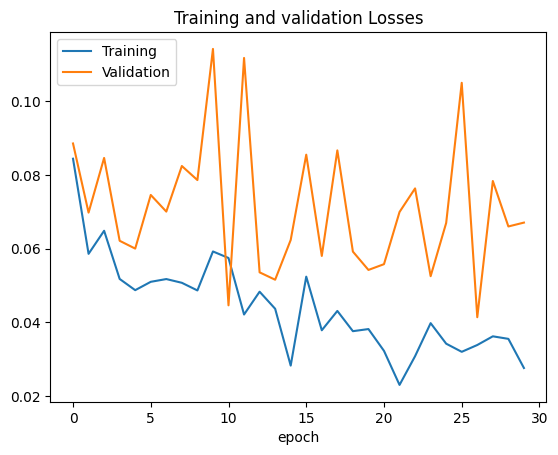

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

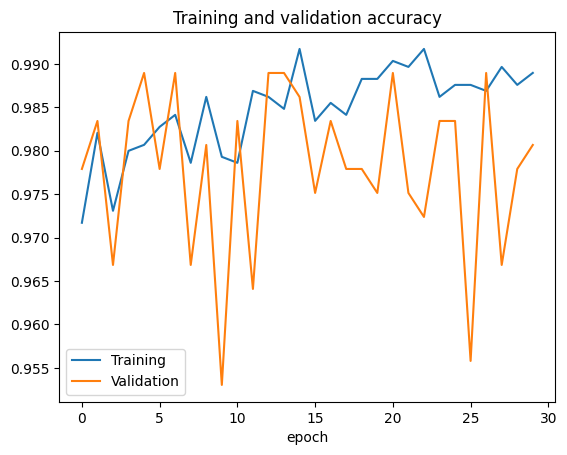

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test_losss :{} test_acc :{}'.format(test_loss,test_acc))

16/16 [==============================] - 9s 569ms/step - loss: 0.1008 - accuracy: 0.9587
test_losss :0.10081145167350769 test_acc :0.9586777091026306


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img=image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction ==0:
    print('Covid Detetcted')
  else:
    print('Report is normal')

Saving covid1.jpg to covid1 (2).jpg
Saving covid2.jpeg to covid2 (2).jpeg
Saving normal1.jpg to normal1 (2).jpg
Saving normal2.jpg to normal2 (2).jpg
1/1 [==============================] - 0s 256ms/step
covid1 (2).jpg
Covid Detetcted
1/1 [==============================] - 0s 20ms/step
covid2 (2).jpeg
Covid Detetcted
1/1 [==============================] - 0s 16ms/step
normal1 (2).jpg
Report is normal
1/1 [==============================] - 0s 18ms/step
normal2 (2).jpg
Report is normal
